<a href="https://www.kaggle.com/code/singhayush16/project-6-case-study-udemy-courses-dataset?scriptVersionId=139063893" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


Reading the **udemy_courses.csv** into Dataframe(df).

In [2]:
df=pd.read_csv("/kaggle/input/udemy-courses/udemy_courses.csv",parse_dates=['published_timestamp'])

# 1. **Display Top 5 Rows of The Dataset**

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


# 2. **Check the Last 3 Rows of The Dataset**

In [4]:
df.tail(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


# 3. **Find Shape of Our Dataset (Number of Rows & Number of Columns)**

In [5]:
print("Rows are :",df.shape[0],"Columns are:",df.shape[1])

Rows are : 3678 Columns are: 12


# 4. **Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

# 5. **Check Null Values In The Dataset**

In [7]:
print("Any Missing Values?",df.isnull().values.any())

Any Missing Values? False


# 6. **Check For Duplicate Data and Drop Them**

In [8]:
print("Are there any Duplicate Value in data?",df.duplicated().any(),df.duplicated().sum())

Are there any Duplicate Value in data? True 6


In [9]:
df=df.drop_duplicates()

In [10]:
print("Are there any Duplicate Value in data?",df.duplicated().any(),df.duplicated().sum())

Are there any Duplicate Value in data? False 0


# 7. **Find Out Number of Courses Per Subjects**

In [11]:
sub=df['subject'].value_counts()

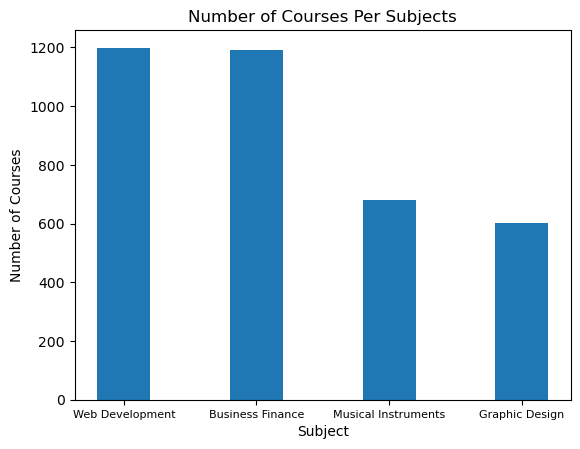

In [12]:
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Per Subjects')
plt.bar(sub.index,sub.values,width=0.4)
plt.xticks(fontsize=8)
plt.show()

# 8. **For Which Levels, Udemy Courses Providing The Courses**

In [13]:
level=df['level'].value_counts()

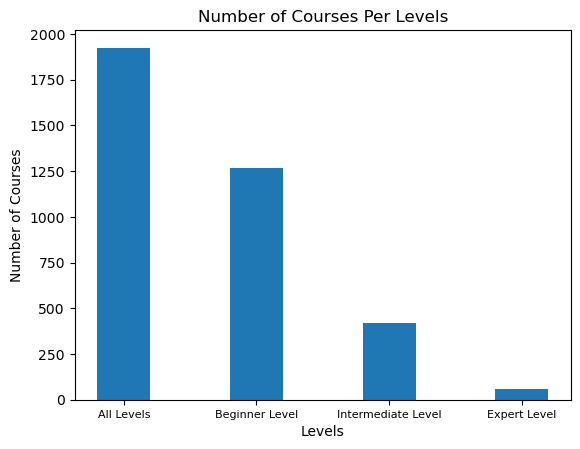

In [14]:
plt.xlabel('Levels')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Per Levels')
plt.bar(level.index,level.values,width=0.4)
plt.xticks(fontsize=8)
plt.show()

# 9. **Display The Count of Paid and Free Courses**

In [15]:
is_paid=df['is_paid'].value_counts()

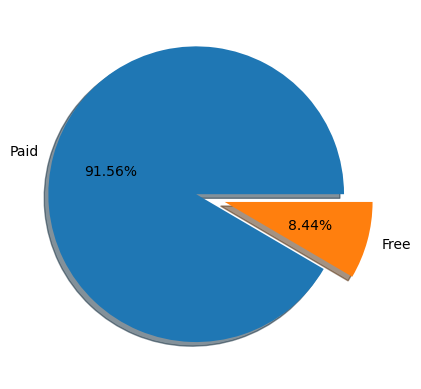

In [16]:
label=['Paid','Free']
plt.pie(is_paid.values,labels=label,autopct='%0.2f%%',shadow=True,explode=[0,0.2])
plt.show()

# 10. **Which Course Has More Lectures (Free or Paid)?**

In [17]:
num_lec=df.groupby('is_paid')['num_lectures'].sum().sort_values(ascending=False)

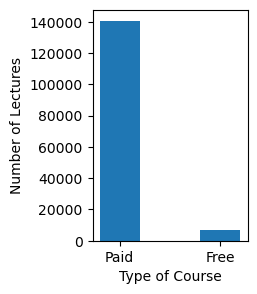

In [18]:
label=['Paid','Free']
fig,ax=plt.subplots(figsize=(2,3))
ax.bar(label,num_lec.values,width=0.4)
plt.ylabel('Number of Lectures')
plt.xlabel('Type of Course')
plt.show()

# 11. **Which Courses Have A Higher Number of Subscribers Free or Paid?**

In [19]:
num_sub=df.groupby('is_paid')['num_subscribers'].sum().sort_values(ascending=False)

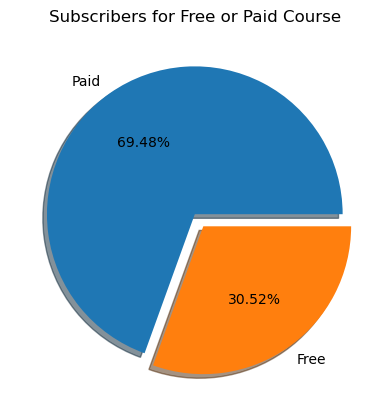

In [20]:
label=['Paid','Free']
plt.pie(num_sub.values,labels=label,autopct='%0.2f%%',shadow=True,explode=[0,0.1])
plt.title('Subscribers for Free or Paid Course')
plt.show()

# 12. **Which Level Has The Highest Number of Subscribers?**

In [21]:
level_sub=df.groupby('level')['num_subscribers'].sum().sort_values(ascending=False)

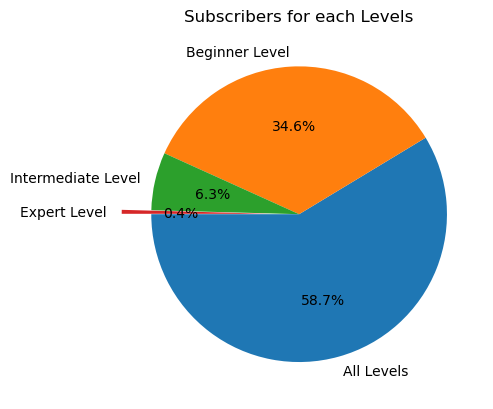

In [22]:
plt.pie(level_sub.values,labels=level_sub.index,autopct='%0.1f%%',explode=[0,0,0,0.2],startangle=180)
plt.title('Subscribers for each Levels')
plt.show()

# 13. **Find Most Popular Course Title**

In [23]:
df[df['num_subscribers'].max()==df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# 14. **Display 10 Most Popular Courses As Per Number of Subscribers**

In [24]:
top_10=df.sort_values(by='num_subscribers',ascending=False).head(10)

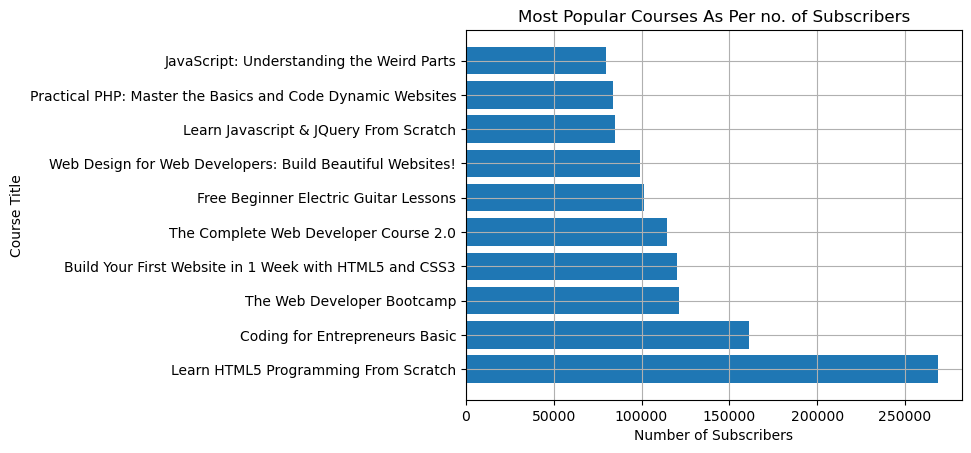

In [25]:
x=top_10['course_title']
y=top_10['num_subscribers']
plt.ylabel('Course Title')
plt.xlabel('Number of Subscribers')
plt.title('Most Popular Courses As Per no. of Subscribers')
plt.barh(x,y)
plt.grid(True)
plt.show()

# 15. **Find The Course Which Is Having The Highest Number of Reviews.**

In [26]:
df[df['num_reviews'].max()==df['num_reviews']]['course_title']

3230    The Web Developer Bootcamp
Name: course_title, dtype: object

# 16. **Does Price Affect the Number of Reviews?**

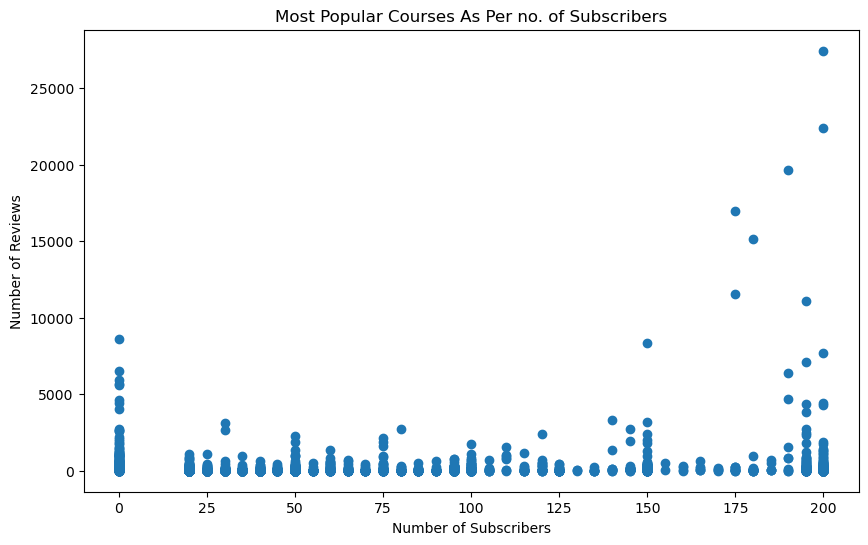

In [27]:
plt.figure(figsize=(10,6))
plt.ylabel('Number of Reviews')
plt.xlabel('Number of Subscribers')
plt.title('Most Popular Courses As Per no. of Subscribers')
plt.scatter(df['price'],df['num_reviews'])

Yes, as price increases the number of reviews also increases.

# 17. **Find Total Number of Courses Related To Python**

In [28]:
number_of_courses_related_to_python=df['course_title'].str.contains('Python',case=False).sum()

In [29]:
print("Total Number of Courses Related To Python are",number_of_courses_related_to_python)

Total Number of Courses Related To Python are 29


# 18. **Display 10 Most Popular Python Courses As Per Number of Subscribers**

In [30]:
python_top_10=df[df['course_title'].str.contains('Python',case=False)].sort_values(by='num_subscribers',ascending=False).head(10)

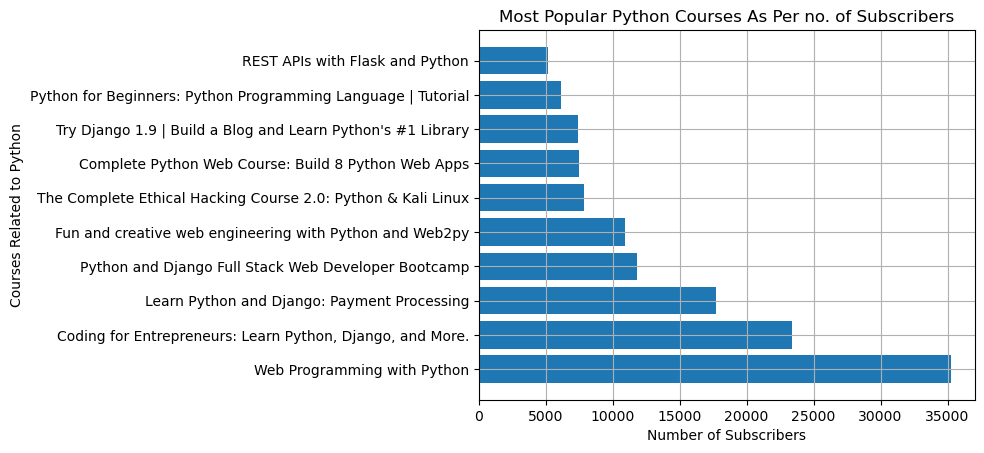

In [31]:
x=python_top_10['course_title']
y=python_top_10['num_subscribers']
plt.ylabel('Courses Related to Python')
plt.xlabel('Number of Subscribers')
plt.title('Most Popular Python Courses As Per no. of Subscribers')
plt.barh(x,y)
plt.grid(True)
plt.show()

# 19. **In Which Year The Highest Number of Courses Were Posted?**

In [32]:
df['published_year']=df['published_timestamp'].map(lambda x:x.year)

In [33]:
year=df['published_year'].value_counts()

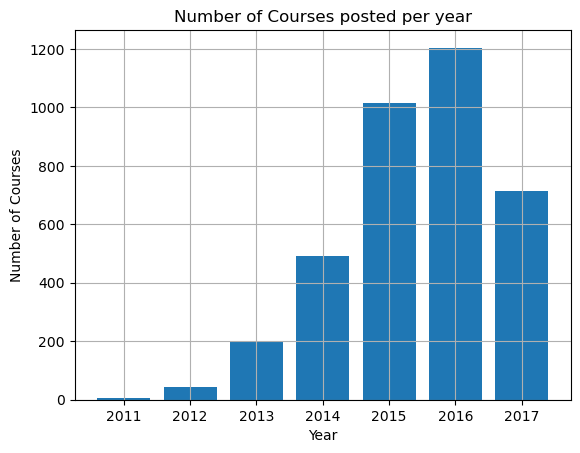

In [34]:
x=year.index
y=year.values
plt.ylabel('Number of Courses')
plt.xlabel('Year')
plt.title('Number of Courses posted per year')
plt.bar(x,y)
plt.grid(True)
plt.show()

By the above bar graph, we conclude that in 2016 the highest number of courses were posted.

# 20. **Display Category-Wise Count of Posted Subjects [Year Wise]**

In [35]:
df.groupby('published_year')['subject'].value_counts()

published_year  subject            
2011            Web Development          5
2012            Web Development         19
                Graphic Design          10
                Musical Instruments     10
                Business Finance         6
2013            Business Finance        84
                Web Development         55
                Musical Instruments     39
                Graphic Design          23
2014            Business Finance       192
                Musical Instruments    120
                Web Development        113
                Graphic Design          65
2015            Business Finance       339
                Web Development        336
                Musical Instruments    171
                Graphic Design         168
2016            Web Development        448
                Business Finance       347
                Musical Instruments    228
                Graphic Design         181
2017            Business Finance       223
                We

In [36]:
data = {
    'published_year': [2011, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017],
    'subject': ['Web Development', 'Web Development', 'Graphic Design', 'Musical Instruments', 'Business Finance', 'Business Finance', 'Web Development', 'Musical Instruments', 'Graphic Design', 'Business Finance', 'Musical Instruments', 'Web Development', 'Graphic Design', 'Business Finance', 'Web Development', 'Musical Instruments', 'Graphic Design', 'Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design', 'Business Finance', 'Web Development', 'Graphic Design', 'Musical Instruments'],
    'count': [5, 19, 10, 10, 6, 84, 55, 39, 23, 192, 120, 113, 65, 339, 336, 171, 168, 448, 347, 228, 181, 223, 223, 155, 112]
}

data = pd.DataFrame(data)

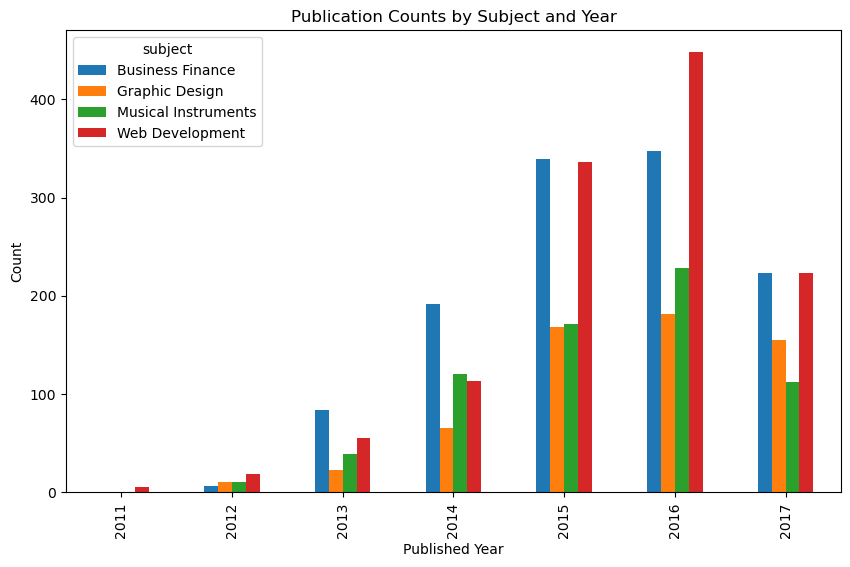

In [37]:
# Create a pivot table to rearrange the data for plotting
pivot_df = data.pivot(index='published_year', columns='subject', values='count')

# Plot the pivot table using a bar plot
pivot_df.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Published Year')
plt.ylabel('Count')
plt.title('Publication Counts by Subject and Year')

# Show the plot
plt.show()